In [1]:
import scvi
import scanpy as sc
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import numpy as np

# Subsample DMSO

**Motivation:**

- model always successfully integrates DMSO 
- hypothesis: due to class imbalance 
- therefore: subsample DMSO 

In [2]:
target2 = sc.read_h5ad("/vol/data/ouologuems/data/preprocessed/target2_spherized_woSource9.h5ad")
target2

/vol/data/ouologuems/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 50376 × 601
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'SMILES_original', 'SMILES_standardized', 'InChI_standardized', 'InChIKey_standardized', 'broad_sample', 'InChIKey', 'pert_iname', 'pubchem_cid', 'target', 'pert_type', 'control_type', 'moa'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


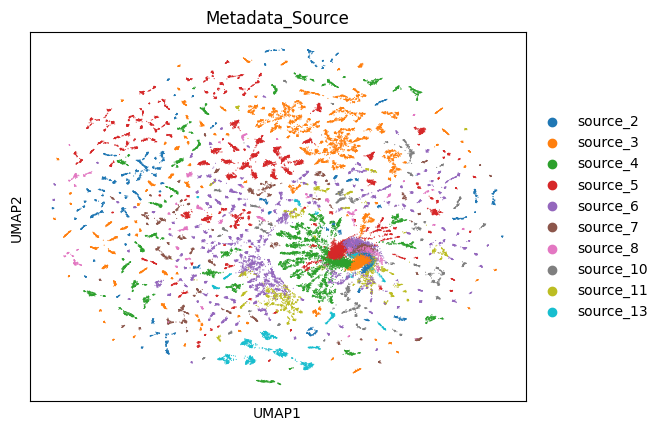

In [3]:
sc.pl.umap(target2, color = "Metadata_Source")

In [4]:
target2.obs.control_type.value_counts()

control_type
negcon            8505
poscon_diverse    3693
poscon_cp         3418
poscon_orf         791
Name: count, dtype: int64

In [5]:
target2.obs.Metadata_JCP2022.value_counts().sort_values(ascending=False)

Metadata_JCP2022
JCP2022_033924    8505
JCP2022_091373     264
JCP2022_025848     264
JCP2022_046462     264
JCP2022_001890     264
                  ... 
JCP2022_115963     129
JCP2022_010382     126
JCP2022_009867     121
JCP2022_051415     119
JCP2022_042332     118
Name: count, Length: 301, dtype: int64

**-> Subsample DMSO from 8505 to 264**
- 10 sources 
- from each source take 26 samples 

In [6]:
target2.obs["keep"] = True
target2.obs.loc[target2.obs.Metadata_JCP2022 == "JCP2022_033924", "keep"] = False

In [7]:
np.sum(target2.obs.keep)

41871

In [8]:
for source in target2.obs.Metadata_Source.unique():
    curr = target2.obs.loc[(target2.obs.Metadata_JCP2022 == "JCP2022_033924") & (target2.obs.Metadata_Source == source)]
    rows = np.random.choice(curr.index.values, 26)
    target2.obs.loc[rows, "keep"] = True

In [9]:
np.sum(target2.obs.keep)

42126

In [10]:
42126 - 41871

255

In [11]:
target2_subsampled = target2[target2.obs.keep]
target2_subsampled

View of AnnData object with n_obs × n_vars = 42126 × 601
    obs: 'Metadata_JCP2022', 'Metadata_InChIKey', 'Metadata_InChI', 'Metadata_Source', 'Metadata_Plate', 'Metadata_Well', 'Metadata_PlateType', 'SMILES_original', 'SMILES_standardized', 'InChI_standardized', 'InChIKey_standardized', 'broad_sample', 'InChIKey', 'pert_iname', 'pubchem_cid', 'target', 'pert_type', 'control_type', 'moa', 'keep'
    uns: 'Metadata_Source_colors', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

In [12]:
sc.tl.umap(target2_subsampled)

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/tools/_umap.py:165: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['umap'] = {'params': {'a': a, 'b': b}}
/vol/data/ouologuems/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


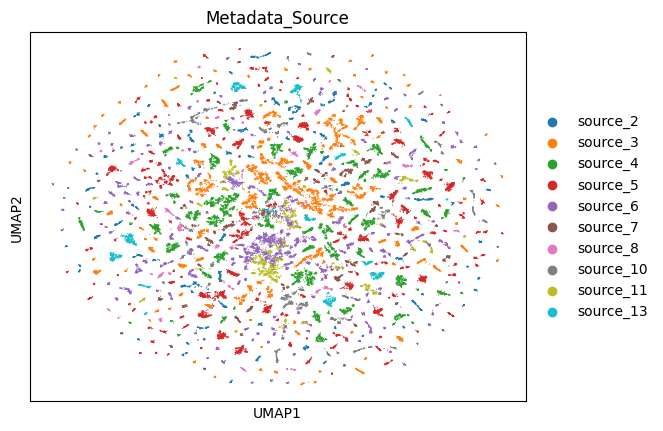

In [13]:
sc.pl.umap(target2_subsampled, color = "Metadata_Source")

/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/vol/data/ouologuems/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


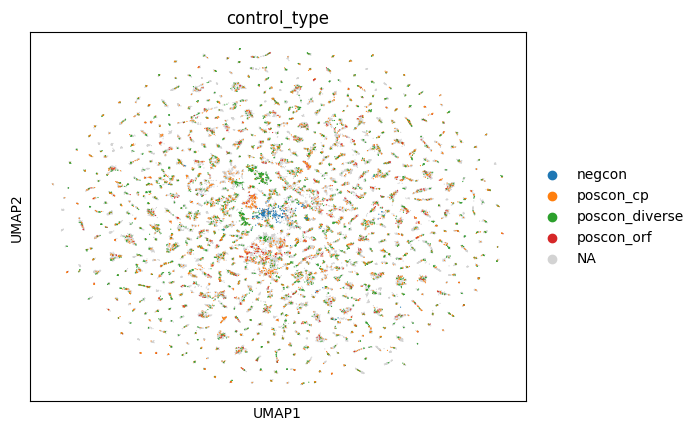

In [14]:
sc.pl.umap(target2_subsampled, color = "control_type")

In [ ]:
target2_subsampled.write_h5ad("/vol/data/ouologuems/data/preprocessed/target2_dmso_subsampled.h5ad")